# Day 5: challenge solutions

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [12]:
ethz = xr.open_dataset('OceanSODA-ETHZ_1985-2019_v2020b.nc')
had = xr.open_dataset('HadISST_sst.nc')

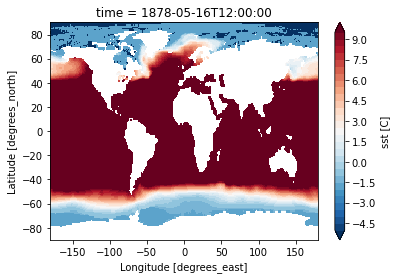

In [13]:
had.sst.isel(time=100).plot(levels=np.arange(-5,10,0.5))

In [14]:
ethz = ethz.temperature
had = had.sst

## 2010 and 1985

In [15]:
# subset annual data
ethz_1985 = ethz.groupby('time.year').mean().sel(year = 1985)
had_1985 = had.groupby('time.year').mean().sel(year = 1985)

ethz_2010 = ethz.groupby('time.year').mean().sel(year = 2010)
had_2010 = had.groupby('time.year').mean().sel(year = 2010)

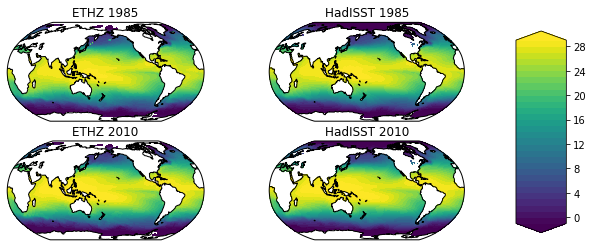

In [16]:
f, axs = plt.subplots(nrows=2,ncols=2,figsize=(14,4),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180))) 
axs = axs.flatten()
# f.suptitle('ETHZ and HadISST SST',fontsize=15)

im = axs[0].contourf(ethz_1985.lon,ethz_1985.lat,ethz_1985,
                     transform=ccrs.PlateCarree(),
                     levels=np.arange(-1,30,1),
                     extend='both')
axs[0].coastlines()
axs[0].set_title('ETHZ 1985')

axs[2].contourf(ethz_2010.lon,ethz_2010.lat,ethz_2010,
                transform=ccrs.PlateCarree(),
                levels=np.arange(-1,30,1),
                extend='both')
axs[2].coastlines()
axs[2].set_title('ETHZ 2010')

axs[1].contourf(had_1985.longitude,had_1985.latitude,had_1985,
                transform=ccrs.PlateCarree(),
                levels=np.arange(-1,30,1),
                extend='both')
axs[1].coastlines()
axs[1].set_title('HadISST 1985')

axs[3].contourf(had_2010.longitude,had_2010.latitude,had_2010,
                transform=ccrs.PlateCarree(),
                levels=np.arange(-1,30,1),
                extend='both')
axs[3].coastlines()
axs[3].set_title('HadISST 2010')

f.subplots_adjust(right=0.6)
cbar_ax = f.add_axes([0.64, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04)

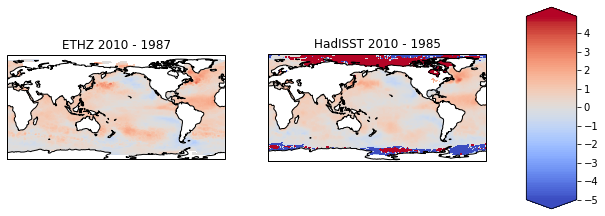

In [17]:
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,4),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180))) 
axs = axs.flatten()
# f.suptitle('ETHZ and HadISST SST',fontsize=15)

im = axs[0].contourf(ethz_1985.lon,ethz_1985.lat,ethz_2010-ethz_1985,
                     transform=ccrs.PlateCarree(),
                     cmap = 'coolwarm',
                     levels=np.arange(-5,5,0.1),
                     extend='both')
axs[0].coastlines()
axs[0].set_title('ETHZ 2010 - 1987')

axs[1].contourf(had_1985.longitude,had_1985.latitude,had_2010 - had_1985,
                transform=ccrs.PlateCarree(),
                cmap = 'coolwarm',
                levels=np.arange(-5,5,0.1),
                extend='both')
axs[1].coastlines()
axs[1].set_title('HadISST 2010 - 1985')

f.subplots_adjust(right=0.6)
cbar_ax = f.add_axes([0.64, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04)

## seasonal example, 2000

In [18]:
ethz = ethz.sel(time=slice('2000-01-01','2005-01-01')).groupby('time.season').mean()
had = had.sel(time=slice('2000-01-01','2005-01-01')).groupby('time.season').mean()

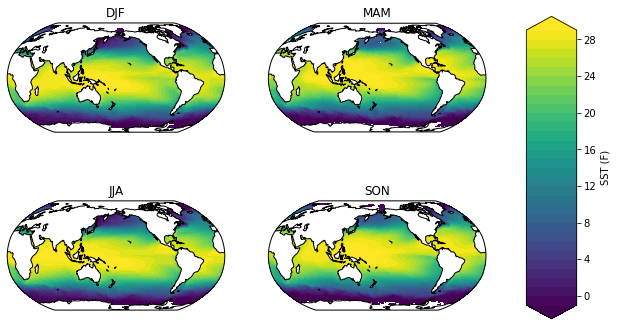

In [20]:
f, axs = plt.subplots(nrows=2,ncols=2,
                      figsize=(14,6),
                      subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180))
                     ) 
axs = axs.flatten()
# f.suptitle('ETHZ and HadISST SST',fontsize=15)

for i in range(0,4):
    im = axs[i].contourf(ethz.lon,ethz.lat,ethz.isel(season=i),
                         transform=ccrs.PlateCarree(),
                         levels=np.arange(-1,30,1),
                         extend='both')
    axs[i].coastlines()

axs[0].set_title('DJF')
axs[1].set_title('MAM')
axs[2].set_title('JJA')
axs[3].set_title('SON')

f.subplots_adjust(right=0.6)
cbar_ax = f.add_axes([0.64, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04,label='SST')